<a href="https://colab.research.google.com/github/aanya0207/Email_Spam_Classifier/blob/main/Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Email Spam Detection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer # convert text into numerical values
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection And Preprocessing

In [ ]:
#Loading the data from csv file to pandas dataframe
mail_data_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mail_data.csv")
print(mail_data_df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


Data Cleaning

In [ ]:
#Replace the mail values with mail string
mail_data=mail_data_df.where((pd.notnull(mail_data_df)),'')

View Dataset

In [ ]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
mail_data.shape

(5572, 2)

Label Encoding

In [ ]:
#Label Spam mail as 0; ham mail as 1
mail_data.loc[mail_data['Category']=='spam','Category']=0
mail_data.loc[mail_data['Category']=='ham','Category']=1

In [ ]:
# Seperate the text and labels
#input column -> x = msg
#target column -> y = category
x=mail_data['Message']
y=mail_data['Category']

In [ ]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [ ]:
print(y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


Training And Testing

In [ ]:
# Splitting data into train & testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

In [ ]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)


(5572,)
(3900,)
(1672,)


In [ ]:
# Feature Extraction is a process to ransform text data into feature vector that can as input to Logistic Rgression
feature_extraction = TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
#min_df -> min count of words should be greater than 1
#stop_words -> to ignore the set of words
x_train_features = feature_extraction.fit_transform(x_train)
x_test_features=feature_extraction.transform(x_test)
#convert y_train & y_test into integers
y_train=y_train.astype('int')
y_test=y_test.astype('int')


In [ ]:
print(x_train)

1256    Just wait till end of march when el nino gets ...
4163    How's it going? Got any exciting karaoke type ...
1994                   Eh den sat u book e kb liao huh...
3587    I am hot n horny and willing I live local to y...
1598    URGENT! Your Mobile number has been awarded wi...
                              ...                        
3671                        Ok thanx... Take care then...
709     To review and KEEP the fantastic Nokia N-Gage ...
2487           I dont thnk its a wrong calling between us
174     Bloody hell, cant believe you forgot my surnam...
1146    Thank you, winner notified by sms. Good Luck! ...
Name: Message, Length: 3900, dtype: object


In [ ]:
print(x_train_features)

  (0, 3454)	0.19084888936848213
  (0, 6608)	0.2677403965759536
  (0, 6201)	0.3263476432164432
  (0, 2312)	0.3028887592062596
  (0, 3908)	0.3585975959370433
  (0, 2288)	0.4348669067683049
  (0, 4304)	0.4348669067683049
  (0, 2786)	0.3532549360877084
  (0, 4410)	0.24909367293271087
  (1, 2832)	0.17755007521476196
  (1, 2855)	0.16951229995043515
  (1, 2409)	0.29332262768846595
  (1, 3475)	0.3272607658309224
  (1, 6387)	0.2752185650145473
  (1, 745)	0.3157377886437559
  (1, 4694)	0.29949706446131497
  (1, 1971)	0.34350149001336333
  (1, 4698)	0.23638965777502066
  (1, 2620)	0.30679987315481655
  (1, 2379)	0.26279544760276824
  (1, 2508)	0.25332700045998413
  (1, 3613)	0.2832563402788741
  (2, 2284)	0.3933066795383704
  (2, 2010)	0.36012163158993726
  (2, 5301)	0.35141864799604605
  :	:
  (3897, 6168)	0.5830861368187334
  (3898, 3212)	0.24142019703764436
  (3898, 2634)	0.25084875024197084
  (3898, 1253)	0.32364133792722427
  (3898, 4139)	0.29032640622628775
  (3898, 1174)	0.2772213345095655

In [ ]:
# Training the machine learning model
model = LogisticRegression()
model.fit(x_train_features,y_train)

LogisticRegression()

In [ ]:
# Testing
prediction_on_training_data=model.predict(x_train_features)
accuracy_on_training_data=accuracy_score(y_train,prediction_on_training_data)

In [ ]:
print(accuracy_on_training_data)

0.9671794871794872


In [ ]:
from sklearn.metrics import precision_score, f1_score

# Calculate precision and F1-score
precision = precision_score(y_train, prediction_on_training_data)
f1 = f1_score(y_train, prediction_on_training_data)

print('Precision: ', precision)
print('F1 Score: ', f1)

Precision:  0.964174011941996
F1 Score:  0.9814761215629523


In [ ]:
input_mail=["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]
#convert text to features vector
input_data_features=feature_extraction.transform(input_mail)
#making prediction
prediction=model.predict(input_data_features)
print(prediction)
if(prediction[0]==1):
  print("Ham Mail")
else:
  print("Spam Mail")

[1]
Ham Mail


Visualizations

Distribution of Email Length

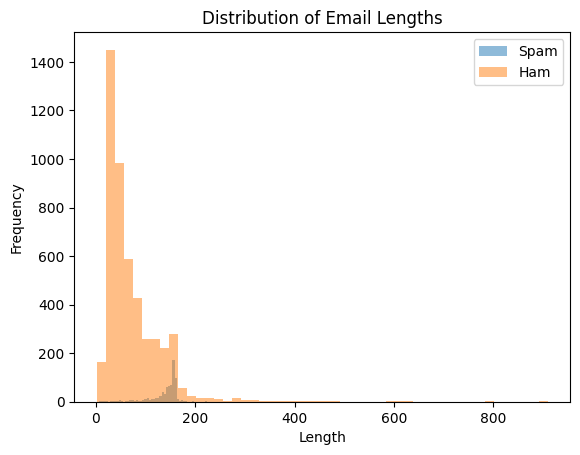

In [ ]:
# Calculate the length of each email
mail_data['Length'] = mail_data['Message'].apply(len)

# Create a histogram of the email lengths
plt.hist(mail_data[mail_data['Category'] == 0]['Length'], bins=50, alpha=0.5, label='Spam')
plt.hist(mail_data[mail_data['Category'] == 1]['Length'], bins=50, alpha=0.5, label='Ham')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Distribution of Email Lengths')
plt.legend()
plt.show()

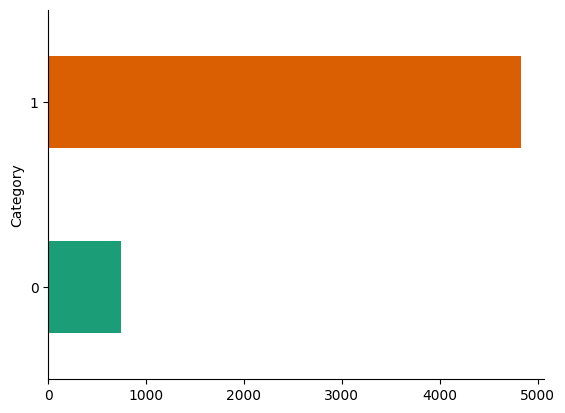

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
mail_data.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

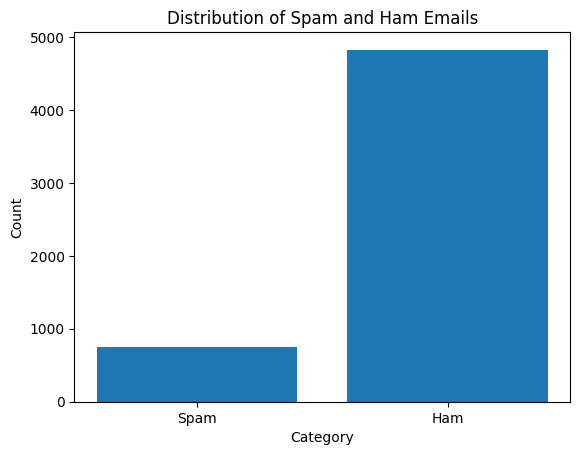

In [ ]:
import matplotlib.pyplot as plt

# Count the number of spam and ham emails
spam_count = mail_data['Category'].value_counts()[0]
ham_count = mail_data['Category'].value_counts()[1]

# Create a bar chart
plt.bar(['Spam', 'Ham'], [spam_count, ham_count])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham Emails')
plt.show()

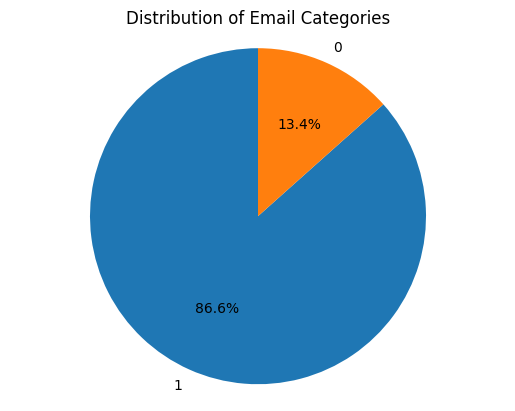

In [ ]:
# @title Distribution of Email Categories

import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = mail_data['Category'].value_counts()

# Create a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Email Categories')
_ = plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

In [ ]:
!pip install wordcloud==1.8.1

In [ ]:
!pip install --upgrade Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 49.4 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.5.0
    Uninstalling Pillow-9.5.0:
      Successfully uninstalled Pillow-9.5.0


In [ ]:
!pip install Pillow==9.5.0

  Using cached Pillow-9.5.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (9.5 kB)
Using cached Pillow-9.5.0-cp310-cp310-manylinux_2_28_x86_64.whl (3.4 MB)
  Attempting uninstall: Pillow
    Found existing installation: pillow 11.0.0
    Uninstalling pillow-11.0.0:
      Successfully uninstalled pillow-11.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-genai 0.3.0 requires pillow<12.0.0,>=10.0.0, but you have pillow 9.5.0 which is incompatible.
scikit-image 0.25.0 requires pillow>=10.1, but you have pillow 9.5.0 which is incompatible.


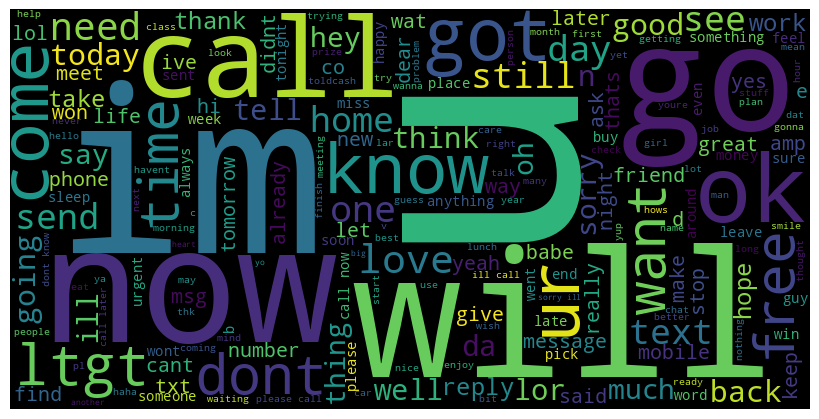

In [ ]:
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Combine all the messages into a single string
text = " ".join(mail_data['Message'])
text = str(text.lower())

# Remove non-alphanumeric characters and extra spaces
text = re.sub(r"[^a-zA-Z0-9 ]", "", text)
text = re.sub(r"\s+", " ", text)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Conculsion: Machine learning effectively detects email spam, improving email filtering and user experience.